# Exploratory Statistics

In [1]:
import pandas as pd
import sqlite3 as sql
import nltk
from pandas import DataFrame,Series

# read and shape

In [2]:
df_lyrics=pd.read_csv("lyrics_cleaned_desc_by_count.csv")
df_lyrics=df_lyrics[['track_id','word','count']]
df_lyrics.head()

,track_id,word,count
0,TRAAAAV128F421A322,like,2
1,TRAAAAV128F421A322,poor,2
2,TRAAAAV128F421A322,order,2
3,TRAAAAV128F421A322,captur,2
4,TRAAAAV128F421A322,social,2


In [3]:
# total rows of df_lyrics
df_lyrics.shape

(12833341, 3)

In [4]:
# number of songs in df_lyrics
df_lyrics_simple=df_lyrics.drop_duplicates(subset='track_id')
df_lyrics_simple.shape

(237648, 3)

In [5]:
# read the tag
df_tag=pd.read_csv("merged_dropdup.csv")
df_tag=df_tag[df_tag['duration']>=150]
df_tag=df_tag[['track_id','genre_merged','song_name_cleaned','album_name','artist_id','artist_name','duration','artist_familiarity','year']]
df_tag.head()

,track_id,genre_merged,song_name_cleaned,album_name,artist_id,artist_name,duration,artist_familiarity,year
0,TRXPGWF128F428F1F7,hiphop,#!*@ you tonight [featuring r. kelly],greatest hits,ARSZ6MA1187FB43D29,the notorious b.i.g.,344.34567,0.668509,2007
1,TRGGQAW128F427F470,hiphop,#1 fan,the one,AR4FVK41187FB4BC83,frankie j,230.94812,0.761357,2005
2,TRYASIL128F147089D,rap,#1 fan,todd smith,ARNHMFD1187FB3B3F6,ll cool j,197.58975,0.749218,2006
3,TRAKYTI128C7196464,hiphop,#1,nellyville,ARCBD0U1187FB466EF,nelly,198.81751,0.912369,2001
4,TRZNWRQ128F9307622,rock,#36,live at red rocks 8.15.95,ARQXC7V1187FB4DA9E,dave matthews band,775.36608,0.811890,1997


In [6]:
df_tag.shape

(20340, 9)

# How genre distributed in 20340 songs?

In [7]:
df_tag2=df_tag.groupby(['genre_merged'])['track_id'].count()
df_tag2= df_tag2.to_frame()
df_tag2.columns=['genre_count']
df_tag2=df_tag2.sort_values(by=['genre_count'],ascending=False)
z = df_tag2.index.get_values()
df_tag2["tag"] = z
df_tag2.plot('tag','genre_count',kind='bar')

In [8]:
df_tag2.index = range(len(df_tag2))
df_tag2

,genre_count,tag
0,4179,rock
1,2938,hiphop
2,2388,pop
3,2190,metal
4,1918,indie
5,1182,rap
6,988,country
7,942,soul
8,845,folk
9,837,punk


# How popular genre changes with the year?

In [9]:
#df_tag_year=df_tag.groupby(['tag','year'])['track_id'].count()
#df_tag_year= df_tag_year.to_frame()
#df_tag_year.columns=['genre_count']
#df_tag_year.head()
#df_tag_year.to_csv('df_tag_year.csv')

#  lyrics with tag

In [10]:
df_tag_test=df_tag
df_lyrics_test=df_lyrics

In [11]:
print("old shape of df_lyrics:",df_lyrics_test.shape)
df_tag_test2=df_tag_test[['track_id','genre_merged']]
df_lyrics_test=df_lyrics_test.merge(df_tag_test2,left_on='track_id',right_on='track_id',how='left')
sum(df_lyrics_test['genre_merged'].isna())
df_lyrics_test=df_lyrics_test[~df_lyrics_test['genre_merged'].isna()]
print("new shape of df_lyrics after deleting the rows without tag:",df_lyrics_test.shape)

old shape of df_lyrics: (12833341, 3)
new shape of df_lyrics after deleting the rows without tag: (1976242, 4)


In [12]:
df_lyrics_test.head()

,track_id,word,count,genre_merged
940,TRAABIG128F9356C56,walk,64,electronic
941,TRAABIG128F9356C56,drum,28,electronic
942,TRAABIG128F9356C56,beat,27,electronic
943,TRAABIG128F9356C56,wanna,24,electronic
944,TRAABIG128F9356C56,hey,23,electronic


# The high frequency words for each tag

In [13]:
df_ly3=df_lyrics_test.groupby(['genre_merged','word'])['count'].sum()
df_ly3= df_ly3.to_frame()
df_ly3.sort_values(by=['count'],ascending=False)
df_ly3.head()

count
genre_merged word       
blues        &        15
             000       2
             1         7
             10        6
             100       1

# Proof-1: The average number of words in each genre

In [14]:
df_ly1=df_lyrics_test.groupby(['genre_merged'])['count'].sum().to_frame()
df_ly1["genre_merged"] = df_ly1.index.get_values()
df_ly1=df_ly1.merge(df_tag2,left_on='genre_merged',right_on='tag',how='left')
df_ly1['ave_num_words']=df_ly1['count']/df_ly1['genre_count']
df_ly1

,count,genre_merged,genre_count,tag,ave_num_words
0,43417,blues,277,blues,156.740072
1,75197,classic rock,513,classic rock,146.582846
2,139472,country,988,country,141.165992
3,134444,electronic,801,electronic,167.845194
4,118361,folk,845,folk,140.072189
5,797692,hiphop,2938,hiphop,271.508509
6,275621,indie,1918,indie,143.702294
7,57000,jazz,342,jazz,166.666667
8,305765,metal,2190,metal,139.618721
9,409799,pop,2388,pop,171.607621


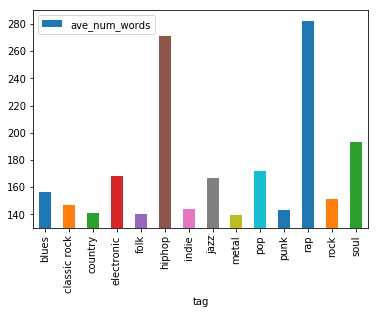

In [69]:
df_ly1.plot('tag','ave_num_words',kind='bar',ylim=[130,290])

Seems that it's easy to distinguish the hiphop and rap from the other genres.
While, for the other genres, this features will not increase the accuracy.

# Advanced feature-1: num of words in each song

In [23]:
df_sum=df_lyrics_test[['track_id','count']]
df_sum2=df_sum.groupby(['track_id'])['count'].sum().to_frame()
df_sum2["track_id"] = df_sum2.index.get_values()
# df_sum2.columns=[['sum_of_words','track_id']]
df_sum2.head()

,count,track_id
track_id,,
TRAABIG128F9356C56,392,TRAABIG128F9356C56
TRAABLR128F423B7E3,90,TRAABLR128F423B7E3
TRAABVM128F92CA9DC,153,TRAABVM128F92CA9DC
TRAACER128F4290F96,130,TRAACER128F4290F96
TRAACIE128F428495B,96,TRAACIE128F428495B


In [17]:
# df_tag_clean=df_tag[['track_id','genre_merged']]
# df_sum2=df_sum2.merge(df_tag_clean,left_on='track_id',right_on='track_id',how='left')
# df_sum2.columns=[['sum_of_words','track_id','tag']]

# count of words

In [24]:
df_count=df_lyrics_test[['track_id','count']]
df_count2=df_count.groupby(['track_id'])['count'].count().to_frame()
df_count2["track_id"] = df_count2.index.get_values()
# df_count2.columns=[['count_of_words','track_id']]
df_count2.head()

,count,track_id
track_id,,
TRAABIG128F9356C56,124,TRAABIG128F9356C56
TRAABLR128F423B7E3,67,TRAABLR128F423B7E3
TRAABVM128F92CA9DC,77,TRAABVM128F92CA9DC
TRAACER128F4290F96,85,TRAACER128F4290F96
TRAACIE128F428495B,75,TRAACIE128F428495B


# Advanced feature-2: repeat times

In [43]:
df_repeat=df_sum2.merge(df_count2,left_on='track_id',right_on='track_id',how='left')
# df_repeat.columns=[['sum_of_words','track_id','count_of_words']]
df_repeat['repeat_times']=df_repeat.iloc[:,0]/df_repeat.iloc[:,2]
df_repeat.head()

,count_x,track_id,count_y,repeat_times
0,392,TRAABIG128F9356C56,124,3.161290
1,90,TRAABLR128F423B7E3,67,1.343284
2,153,TRAABVM128F92CA9DC,77,1.987013
3,130,TRAACER128F4290F96,85,1.529412
4,96,TRAACIE128F428495B,75,1.280000


# Proof-2: the repeat times in each genre

In [45]:
df_repeat2=df_repeat.merge(df_tag_test2,left_on='track_id',right_on='track_id',how='left')
df_repeat2=df_repeat2.groupby(['genre_merged'])['repeat_times'].mean().to_frame()
df_repeat2

,repeat_times
genre_merged,
blues,1.842425
classic rock,1.784374
country,1.718968
electronic,1.861923
folk,1.603560
hiphop,1.987471
indie,1.701415
jazz,1.822020
metal,1.605023


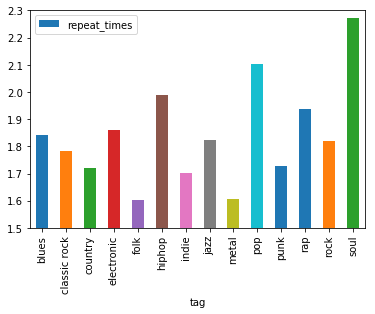

In [68]:
df_repeat2["tag"] = df_repeat2.index.get_values()
df_repeat2.plot('tag','repeat_times',kind='bar',ylim=[1.5,2.3])

# Adcanced feature-3: average length of words in one song

In [36]:
df_length=df_lyrics_test
df_length=df_length.drop_duplicates(subset='word')
df_length.shape

(4873, 4)

In [37]:
df_length.head()

,track_id,word,count,genre_merged
940,TRAABIG128F9356C56,walk,64,electronic
941,TRAABIG128F9356C56,drum,28,electronic
942,TRAABIG128F9356C56,beat,27,electronic
943,TRAABIG128F9356C56,wanna,24,electronic
944,TRAABIG128F9356C56,hey,23,electronic


In [38]:
df_length["lenword"]=0
for i in range(df_length.shape[0]):
    df_length.iloc[i,4]=len(df_length.iloc[i,1])
    if i%100==0:
        print(i)
df_length.head()

/Users/YIJIE/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/YIJIE/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800


,track_id,word,count,genre_merged,lenword
940,TRAABIG128F9356C56,walk,64,electronic,4
941,TRAABIG128F9356C56,drum,28,electronic,4
942,TRAABIG128F9356C56,beat,27,electronic,4
943,TRAABIG128F9356C56,wanna,24,electronic,5
944,TRAABIG128F9356C56,hey,23,electronic,3


In [52]:
df_lyrics_test.shape

(1976242, 4)

In [54]:
df_length=df_length[['word','lenword']]
df_lyrics_test=df_lyrics_test.merge(df_length,left_on='word',right_on='word',how='left')
df_lyrics_test.head()

,track_id,word,count,genre_merged,lenword
0,TRAABIG128F9356C56,walk,64,electronic,4
1,TRAABIG128F9356C56,drum,28,electronic,4
2,TRAABIG128F9356C56,beat,27,electronic,4
3,TRAABIG128F9356C56,wanna,24,electronic,5
4,TRAABIG128F9356C56,hey,23,electronic,3


In [57]:
df_lyrics_test2=df_lyrics_test.groupby(['track_id'])['lenword'].mean().to_frame()
df_lyrics_test2["track_id"] = df_lyrics_test2.index.get_values()
df_lyrics_test2.head()

,lenword,track_id
track_id,,
TRAABIG128F9356C56,4.524194,TRAABIG128F9356C56
TRAABLR128F423B7E3,4.686567,TRAABLR128F423B7E3
TRAABVM128F92CA9DC,4.883117,TRAABVM128F92CA9DC
TRAACER128F4290F96,4.364706,TRAACER128F4290F96
TRAACIE128F428495B,4.400000,TRAACIE128F428495B


# Proof-3: the length of words for each genre

In [61]:
df_lyrics_test3=df_lyrics_test.groupby(['genre_merged'])['lenword'].mean().to_frame()
df_lyrics_test3['tag'] = df_lyrics_test3.index.get_values()
df_lyrics_test3

,lenword,tag
genre_merged,,
blues,4.437999,blues
classic rock,4.472697,classic rock
country,4.447689,country
electronic,4.481176,electronic
folk,4.487800,folk
hiphop,4.380469,hiphop
indie,4.485273,indie
jazz,4.429863,jazz
metal,4.597705,metal


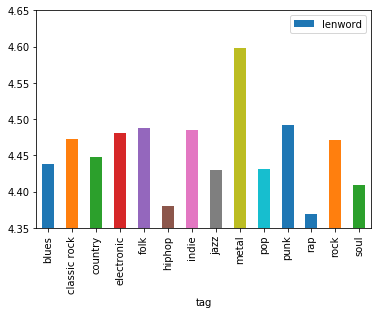

In [67]:
df_lyrics_test3.plot('tag','lenword',kind='bar',ylim=[4.35,4.65])

# prepare the data for advanced model

In [79]:
df_newfea=df_repeat.merge(df_lyrics_test2,on='track_id',how='left')
df_newfea.columns=[['sum_of_words','track_id','count_of_words','repeat_times','lenword']]
df_newfea.head()

,sum_of_words,track_id,count_of_words,repeat_times,lenword
0,392,TRAABIG128F9356C56,124,3.161290,4.524194
1,90,TRAABLR128F423B7E3,67,1.343284,4.686567
2,153,TRAABVM128F92CA9DC,77,1.987013,4.883117
3,130,TRAACER128F4290F96,85,1.529412,4.364706
4,96,TRAACIE128F428495B,75,1.280000,4.400000


In [80]:
df_newfea.to_csv('new_features.csv',index=False)